In [7]:
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from shutil import copyfile

In [8]:
INITIAL_DATA_DIRECTORY = "/media/aasim/383C03243C02DD2E/Kaggle_Comp/flower-classification/input/flowers"
DATA_DIRECTORY = "flower"
labels = []
labelencoder = LabelEncoder()
labelencoder.fit(os.listdir(INITIAL_DATA_DIRECTORY))
if not os.path.exists(DATA_DIRECTORY): os.makedirs(DATA_DIRECTORY)
for item in os.listdir(INITIAL_DATA_DIRECTORY):
    if item != "flowers":
        for element in os.listdir(INITIAL_DATA_DIRECTORY + "/" + item):
          if ".py" not in element:
            if not os.path.exists(DATA_DIRECTORY[0:] +  "/" + element):
                copyfile(INITIAL_DATA_DIRECTORY[0:] + "/" + item + "/" + element, DATA_DIRECTORY[0:] +  "/" + element)
            labels.append((element, labelencoder.transform([item]).tolist()[0]))
df = pd.DataFrame(data=labels,columns=['id', 'label']).sample(frac=1).reset_index(drop=True)

In [9]:
df.head()

,id,label
0,13903946578_187f904c9a_n.jpg,4
1,7481204112_e3c57dd40a_n.jpg,4
2,2254152047_d3bf8903cd_n.jpg,4
3,5979669004_d9736206c9_n.jpg,3
4,215798357_3f4bfa27b7.jpg,3


In [20]:
import numpy as np
import glob
flowers_path = "/media/aasim/383C03243C02DD2E/Kaggle_Comp/flower-classification/input/flowers"
subfolders = [f.path for f in os.scandir(flowers_path) if f.is_dir()]
image_paths = []
for x in subfolders:
    image_paths.extend(glob.glob(os.path.join(x, "*.jpg")))
    target = [x.split("/")[-2] for x in image_paths]

lb_enc = LabelEncoder()
target_enc = lb_enc.fit_transform(target)
target_enc = np.array(target_enc)

df2 = pd.DataFrame({"image_paths":image_paths[:], "targets":target_enc[:]}).sample(frac=1).reset_index(drop=True)
df2.to_csv("flower_detection.csv")

In [12]:
df2.head()

,image_paths,targets
0,/media/aasim/383C03243C02DD2E/Kaggle_Comp/flow...,0
1,/media/aasim/383C03243C02DD2E/Kaggle_Comp/flow...,3
2,/media/aasim/383C03243C02DD2E/Kaggle_Comp/flow...,4
3,/media/aasim/383C03243C02DD2E/Kaggle_Comp/flow...,4
4,/media/aasim/383C03243C02DD2E/Kaggle_Comp/flow...,4


In [13]:
len(df2)

4323

In [16]:
import seaborn as sns

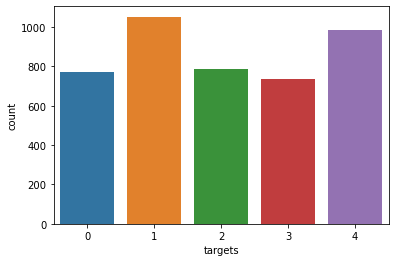

In [17]:
sns.countplot(df2["targets"])

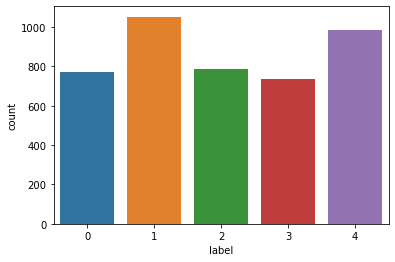

In [19]:
sns.countplot(df["label"])